In this file, I will be implemented a Neural Network to classify the crocodiles

In [4]:
import pandas as pd
import numpy as np
import torch

In [5]:
crocs = pd.read_csv('crocodile_dataset.csv')
crocs.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [6]:
crocs.isnull().sum()

Observation ID          0
Common Name             0
Scientific Name         0
Family                  0
Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
Date of Observation     0
Country/Region          0
Habitat Type            0
Conservation Status     0
Observer Name           0
Notes                   0
dtype: int64

#### Preprocessing the Data

In [7]:
# Removing unnecessary columns
crocs = crocs.drop(['Observation ID', 'Scientific Name', 'Family', 'Genus', 'Conservation Status', 'Observer Name', 'Notes'], axis=1)
crocs.head()

,Common Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type
0,Morelet's Crocodile,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps
1,American Crocodile,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves
2,Orinoco Crocodile,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas
3,Morelet's Crocodile,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers
4,Mugger Crocodile (Marsh Crocodile),3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers


In [8]:
#One hot encoding remaining non-numerical features
crocs = pd.get_dummies(crocs, columns=['Age Class', 'Sex', 'Habitat Type', 'Country/Region'], drop_first=True)
crocs.head()

,Common Name,Observed Length (m),Observed Weight (kg),Date of Observation,Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,...,Country/Region_Sierra Leone,Country/Region_South Africa,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_USA (Florida),Country/Region_Uganda,Country/Region_Venezuela,Country/Region_Vietnam
0,Morelet's Crocodile,1.90,62.0,31-03-2018,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,American Crocodile,4.09,334.5,28-01-2015,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Orinoco Crocodile,1.08,118.2,07-12-2010,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,Morelet's Crocodile,2.42,90.4,01-11-2019,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Mugger Crocodile (Marsh Crocodile),3.75,269.4,15-07-2019,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Converting the data into two features, one for the month and another for the year
crocs['Date of Observation'] = pd.to_datetime(crocs['Date of Observation'])

#Getting month and year stats
crocs['Year'] = crocs['Date of Observation'].dt.year
crocs['Month'] = crocs['Date of Observation'].dt.month

crocs = crocs.drop(columns=['Date of Observation'], axis=1)
crocs.head()

C:\Users\jonny\AppData\Local\Temp\ipykernel_4940\3337342946.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  crocs['Date of Observation'] = pd.to_datetime(crocs['Date of Observation'])


,Common Name,Observed Length (m),Observed Weight (kg),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,...,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_USA (Florida),Country/Region_Uganda,Country/Region_Venezuela,Country/Region_Vietnam,Year,Month
0,Morelet's Crocodile,1.90,62.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,2018,3
1,American Crocodile,4.09,334.5,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,2015,1
2,Orinoco Crocodile,1.08,118.2,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,2010,12
3,Morelet's Crocodile,2.42,90.4,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,2019,11
4,Mugger Crocodile (Marsh Crocodile),3.75,269.4,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,2019,7


In [10]:
#Normalizing the values
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Normalizing the year
max_year = crocs.max(axis=0)['Year']
min_year = crocs.min(axis=0)['Year']
crocs['Year'] = (crocs['Year'] - min_year) / (max_year - min_year)

#Normalizing the month
crocs['Month'] = np.sin((np.pi*crocs['Month']) / 12)

#Normalizing length and weight
scaler = StandardScaler()
scale = ['Observed Length (m)', 'Observed Weight (kg)']
crocs[scale] = scaler.fit_transform(crocs[scale])

#Converting the name to integers
le = LabelEncoder()
crocs['Common Name'] = le.fit_transform(crocs['Common Name'])

crocs.head()

,Common Name,Observed Length (m),Observed Weight (kg),Age Class_Hatchling,Age Class_Juvenile,Age Class_Subadult,Sex_Male,Sex_Unknown,Habitat Type_Brackish Rivers,Habitat Type_Coastal Lagoons,...,Country/Region_Sri Lanka,Country/Region_Sudan,Country/Region_Tanzania,Country/Region_Thailand,Country/Region_USA (Florida),Country/Region_Uganda,Country/Region_Venezuela,Country/Region_Vietnam,Year,Month
0,7,-0.469565,-0.535536,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,0.65,7.071068e-01
1,0,1.526801,1.020725,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,0.50,2.588190e-01
2,11,-1.217063,-0.214575,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,0.25,1.224647e-16
3,7,0.004458,-0.373342,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,0.70,2.588190e-01
4,8,1.216862,0.648936,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,0.70,9.659258e-01


In [11]:
# Creating the target and removing it from the croc dataframe
target = crocs['Common Name']
crocs.drop(['Common Name'], axis=1, inplace=True)

#### Creating the Train Test split and preparing the data

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(crocs, target, test_size=0.2, random_state=42, stratify=target)


In [13]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
X_train = torch.tensor(X_train.astype(float).values, dtype=torch.float32)
X_test = torch.tensor(X_test.astype(float).values, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(float).values, dtype=torch.long)
y_test = torch.tensor(y_test.astype(float).values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [14]:
#Defining dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#### Creating a Neural Network

In [15]:
import torch.nn as nn
class ModelV1(nn.Module):
    def __init__(self, input_size, hidden, output_size):
        super().__init__()
        self.in_layer = nn.Linear(in_features=input_size, out_features=hidden)
        self.hidden = nn.Linear(in_features=hidden, out_features=hidden)
        self.out_layer = nn.Linear(in_features=hidden, out_features=output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.in_layer(x))
        x = self.relu(self.hidden(x))
        x = self.relu(self.hidden(x))
        x = self.out_layer(x)
        return x

In [16]:
#Preparing the data
import torch.optim as optim

num_classes = target.max(axis=0) + 1
print(f"There are {len(crocs.columns)} input variables and {num_classes} output classes")
model = ModelV1(input_size=len(crocs.columns), hidden=16, output_size=num_classes)
optimizer = optim.AdamW(params=model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

There are 83 input variables and 18 output classes


In [17]:
#Creating an accuracy function
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

#### Creating the Training Loop

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score
epochs = 51
train_losses, test_losses = [], []
train_accs, test_accs = [], []

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    for X, y in train_loader:
        optimizer.zero_grad()
        preds = model(X)

        #Calculate loss and accuracy
        loss = loss_fn(preds, y)
        train_loss += loss.item()
        pred_classes = torch.argmax(torch.softmax(preds, dim=1), dim=1)
        train_acc += (pred_classes == y).sum().item() / len(preds)

        loss.backward()
        optimizer.step()
    train_acc /= len(train_loader)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    #Validation Loop
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.inference_mode():
        for X, y in test_loader:
            preds = model(X)
            loss = loss_fn(preds, y)
            test_loss += loss.item()
            pred_classes = torch.argmax(torch.softmax(preds, dim=1), dim=1)
            test_acc += (pred_classes == y).sum().item() / len(preds)
    test_acc /= len(test_loader)
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} |  Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")     

Epoch [1/51] | Train Loss: 2.9050 | Test Loss: 2.9038 |  Train Acc: 0.0469 | Test Acc: 0.0664
Epoch [11/51] | Train Loss: 2.5134 | Test Loss: 2.5068 |  Train Acc: 0.1959 | Test Acc: 0.2383
Epoch [21/51] | Train Loss: 1.0468 | Test Loss: 1.0702 |  Train Acc: 0.7788 | Test Acc: 0.7930
Epoch [31/51] | Train Loss: 0.2557 | Test Loss: 0.3069 |  Train Acc: 0.9772 | Test Acc: 0.9492
Epoch [41/51] | Train Loss: 0.0972 | Test Loss: 0.1562 |  Train Acc: 0.9880 | Test Acc: 0.9531
Epoch [51/51] | Train Loss: 0.0545 | Test Loss: 0.1264 |  Train Acc: 0.9928 | Test Acc: 0.9531


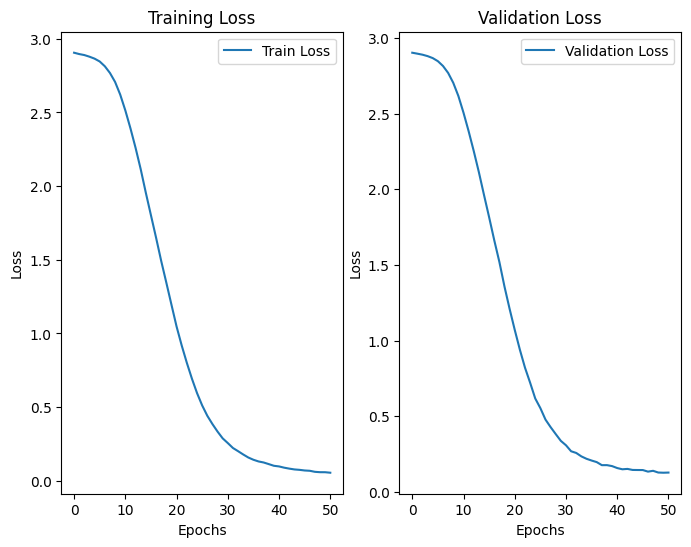

In [19]:
#Plotting the values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_losses, label="Validation Loss")
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
model.eval()
test_loss = 0.0
test_correct = 0
test_total = 0

all_preds = []   # for AUC
all_labels = []  # true labels

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch, y_batch

        outputs = model(X_batch) # Logits
        loss = loss_fn(outputs, y_batch)

        test_loss += loss.item() * X_batch.size(0)

        probs = torch.softmax(outputs, dim=1)

        # Store for AUC
        all_preds.extend(probs.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

        # Accuracy (thresholded at 0.5)
        preds = probs.argmax(dim=1)
        test_correct += (preds == y_batch).sum().item()
        test_total += y_batch.size(0)

# Compute averages
avg_test_loss = test_loss / test_total
acc_nn = test_correct / test_total

# Compute AUC
auc_nn = roc_auc_score(all_labels, all_preds, multi_class='ovr')

print(f"\nTest Loss: {avg_test_loss:.4f}")
print(f"Test Accuracy: {acc_nn:.4f}")
print(f"Test AUC: {auc_nn:.4f}")


Test Loss: 0.0977
Test Accuracy: 0.9750
Test AUC: 0.9993
